# Projeto de Aprendizado de Máquina: Predição de Diabetes

In [ ]:
display(Image(url='https://img.freepik.com/vetores-premium/conceito-de-diabetes-personagem-de-desenho-animado-medico-aconselhando-pequenas-pessoas-pacientes-em-estilo-de-vida-saudavel-em-branco_109722-1158.jpg?w=2000',width=975))

## Introdução

O conjunto de dados utilizados para a realização desse projeto nos traz dados relevantes sobre pacientes que podem desenvolver diabetes, com base em vários atributos que conheceremos a seguir. Com o conjunto de dados retirado do seguinte link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset, criaremos dois modelos de aprendizado de máquina, um de agrupamento e outro de classificação, para realizar predições dos pacientes com base em seu histórico médico.

*ATRIBUTOS:*


*   **gender**: refere-se ao sexo biológico do indivíduo, o que pode ter impacto na sua suscetibilidade ao diabetes. Existem três categorias nele: masculino, feminino e outros.
*   **age**:  é um fator importante, pois o diabetes é mais comumente diagnosticado em adultos mais velhos. A idade varia de 0 a 80 em nosso conjunto de dados.
*   **hypertesion**: é uma condição médica na qual a pressão sanguínea nas artérias é persistentemente elevada. Tem valores 0 ou 1 onde 0 indica que não tem hipertensão e 1 significa que tem hipertensão.
*   **heart_disease**:  é outra condição médica que está associada a um risco aumentado de desenvolver diabetes. Tem valores 0 ou 1 onde 0 indica que não tem doença cardíaca e 1 significa que tem doença cardíaca.
*   **smoking_history**: O histórico de tabagismo também é considerado um fator de risco para diabetes e pode exacerbar as complicações associadas ao diabetes. Em nosso conjunto de dados, temos 5 categorias, ou seja, não atual, anterior, sem informações, atual, nunca e sempre.
*   **bmi**:  IMC (Índice de Massa Corporal) é uma medida de gordura corporal com base no peso e na altura. Valores mais altos de IMC estão associados a um maior risco de diabetes. A faixa de IMC no conjunto de dados é de 10,16 a 71,55. IMC inferior a 18,5 é baixo peso, 18,5-24,9 é normal, 25-29,9 é sobrepeso e 30 ou mais é obeso.
*   **HbA1c_level**: O nível de HbA1c (Hemoglobina A1c) é uma medida do nível médio de açúcar no sangue de uma pessoa nos últimos 2-3 meses. Níveis mais altos indicam um risco maior de desenvolver diabetes. Principalmente mais de 6,5% do nível de HbA1c indica diabetes.
*   **blood_glucose_level**: O nível de glicose no sangue refere-se à quantidade de glicose na corrente sanguínea em um determinado momento. Níveis elevados de glicose no sangue são um indicador chave de diabetes.
*   **diabetes**: é a variável alvo prevista, com valores de 1 indicando a presença de diabetes e 0 indicando a ausência de diabetes.



## Pré Processamento

Importando as bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn.objects as so
from IPython.display import Image, display

In [2]:
dados = pd.read_csv("diabetes_prediction_dataset.csv")

Vamos visualizar o conjunto de dados.

In [ ]:
dados.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Agora verificamos se os dados possuem valores nulos.

In [ ]:
valores_nulos = dados.isnull().values.any()

if valores_nulos:
  print("Há valores nulos na tabela.")
else:
  print("Não há valores nulos na tabela.")

Não há valores nulos na tabela.


In [ ]:
valores_nulos = dados.isnull().sum()
print(valores_nulos)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Conhecendo melhor os dados:

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
dados.shape

(100000, 9)

In [ ]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [ ]:
dados[["gender","smoking_history"]].describe().T

,count,unique,top,freq
gender,100000,3,Female,58552
smoking_history,100000,6,No Info,35816


## Explorando os dados: Distribuição dos valores

In [ ]:
display(Image(url='https://img.freepik.com/vetores-gratis/medicos-minusculos-com-ilustracao-vetorial-plana-de-glicosimetro-terapeutas-femininas-analisando-o-resultado-do-teste-de-glicose-no-sangue-dos-pacientes-fazendo-diagnostico-para-diabeticos-hipoglicemia-conceito-de-medicina_74855-23209.jpg',width=875))

### Contagem dos valores

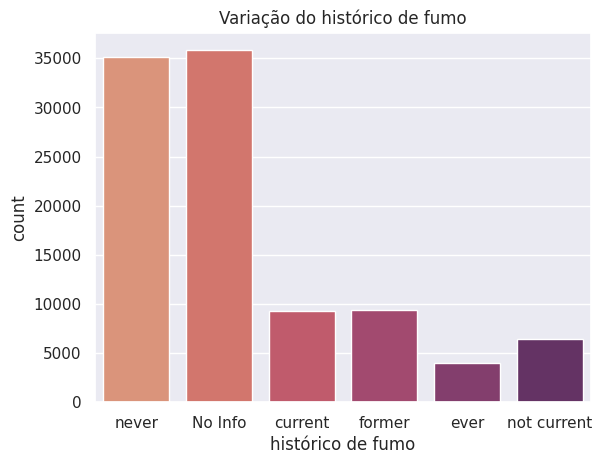

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(data=dados, x="smoking_history", palette="flare")
plt.xlabel('histórico de fumo')
plt.title('Variação do histórico de fumo')
plt.show()

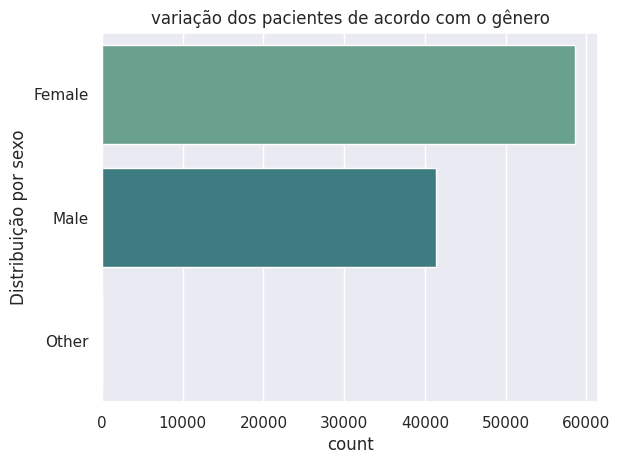

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(data=dados,y="gender",palette="crest")
plt.ylabel('Distribuição por sexo')
plt.title('variação dos pacientes de acordo com o gênero')
plt.show()

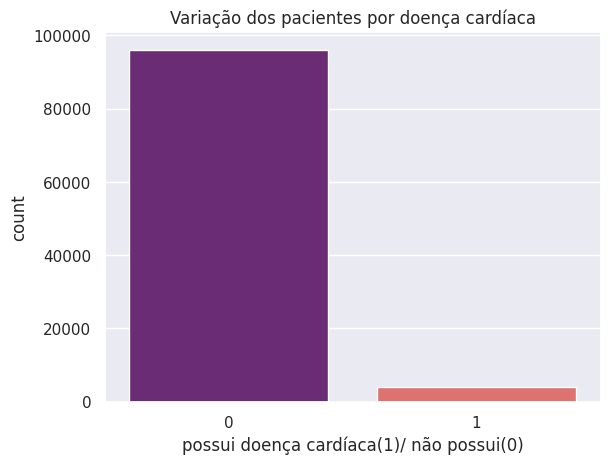

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(data=dados, x="heart_disease", palette="magma")
plt.xlabel('possui doença cardíaca(1)/ não possui(0)')
plt.title('Variação dos pacientes por doença cardíaca')
plt.show()

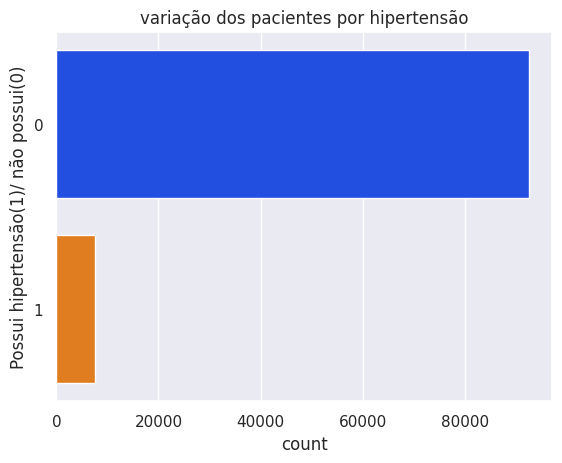

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(data=dados,y="hypertension",palette="bright")
plt.ylabel('Possui hipertensão(1)/ não possui(0)')
plt.title('variação dos pacientes por hipertensão')
plt.show()

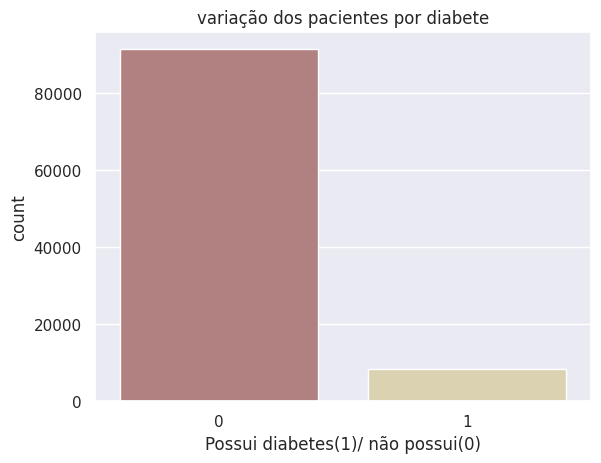

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(data=dados,x="diabetes",palette="pink")
plt.xlabel('Possui diabetes(1)/ não possui(0)')
plt.title('variação dos pacientes por diabete')
plt.show()

> Acima, plotamos gráficos que mostram a distribuição dos valores únicos de cada coluna da tabela que estamos utilizando. Notamos, por exemplo, que a maioria dos pacientes na base de dados não possui diabetes, hipertensão ou doenças cardíacas. Isso pode afetar significativamente o projeto. Também vemos a quantidade de pacientes de acordo com seu histórico de fumo e gênero, que é predominantemente feminino. Isso pode nos levar a tirar algumas conclusões sobre os dados.

### Conhecendo os valores

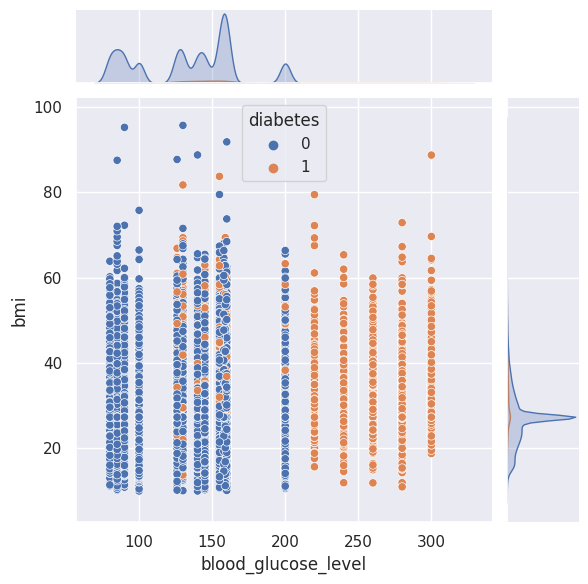

In [ ]:
sns.jointplot(data=dados, x="blood_glucose_level", y="bmi", hue="diabetes")

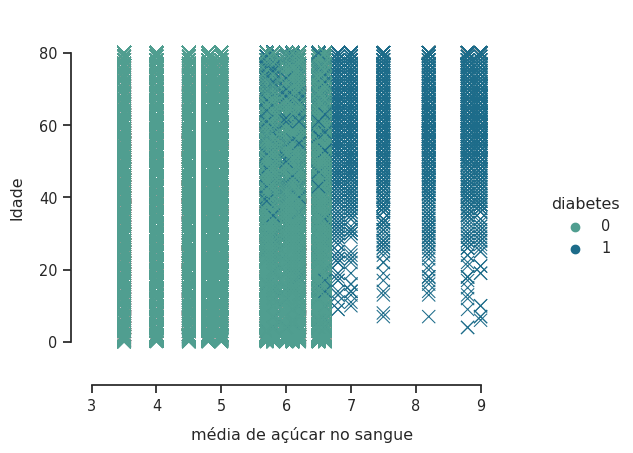

In [ ]:
sns.set_theme(style="ticks", font_scale=0.95)
g = sns.relplot(
    data=dados,
    x="HbA1c_level", y="age", hue="diabetes",
    palette="crest", marker="x", s=90,
)
g.set_axis_labels("média de açúcar no sangue", "Idade", labelpad=10)
g.legend.set_title("diabetes")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

> Na primeira visualização, podemos observar que quanto maior o nível de glicose no sangue, maior é a probabilidade do paciente ter diagnóstico de diabetes. Notamos também que alguns pacientes com IMC normal podem ter diagnóstico de diabetes, o que sugere que o IMC não é um fator determinante para o diagnóstico.

> Na segunda visualização, observamos uma tendência semelhante à da primeira: quanto maior a média de açúcar no sangue, maior é a chance do paciente ter diabetes. Analisando a idade, notamos que a maioria dos pacientes com diabetes tem mais de 35 anos.

## AGRUPAMENTO

In [ ]:
display(Image(url='https://img.freepik.com/vetores-gratis/medico-com-lupa-e-medidor-de-teste-de-glicose-no-sangue-diabetes-mellitus-diabetes-tipo-2-e-conceito-de-producao-de-insulina-em-fundo-branco-ilustracao-de-vetor-isolado-de-coral-rosa_335657-1530.jpg',width=775))

Nessa parte do projeto , queremos encontrar um conjunto de perfis médios e alocar os pacientes ao perfil mais próximo dele.

> Qual a quantidade de grupos?

> Qual a característica de cada grupo?

> Como calcular a distância entre o grupo e os pacientes?

### K-Médias

O agrupamento em k-médias buscar alocar o conjunto de dados em **K** grupos ou **Clusters** para seu grupo mais próximo. Para o agrupamento de K-Médias, temos:

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans()

### Dados

Como já realizamos o pré-processamento acima, vamos só visualizar os dados novamente.

In [ ]:
dados.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Vamos usar o seaborn para gerar visualizações para cada par de colunas.

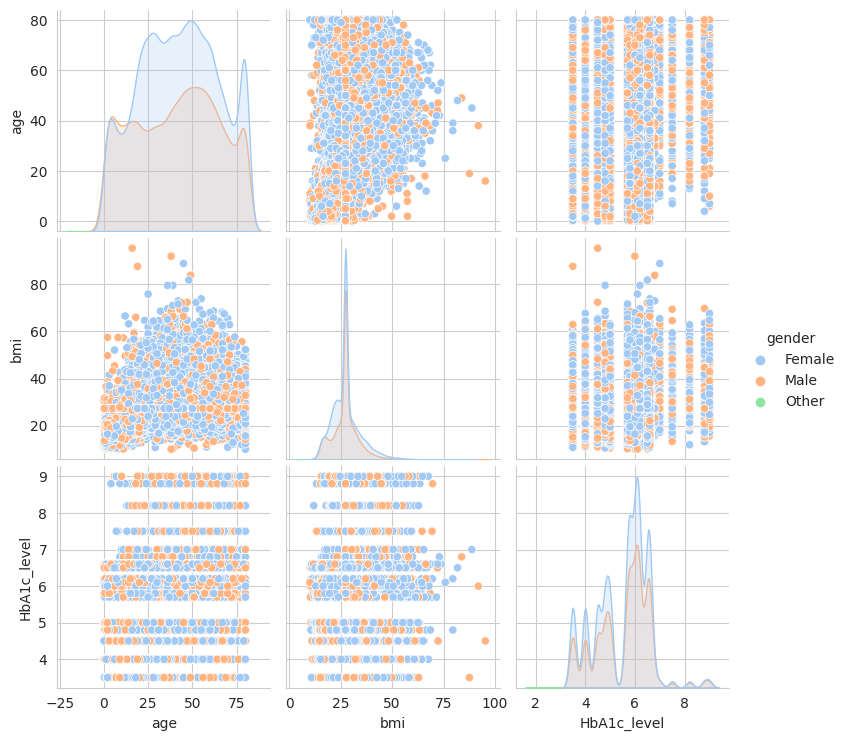

In [ ]:
with sns.axes_style('whitegrid'):

    grafico = sns.pairplot(data=dados.drop(['hypertension', 'heart_disease', 'smoking_history','blood_glucose_level', 'diabetes'],axis=1) ,hue="gender",palette="pastel")


>Notamos nos dados que o genêro não interfere o bastante para segmentarmos os dados em  grupos, então iremos utilizar apenas os atributos necessários para realização desse parte do projeto.

In [ ]:
data = dados[["age","bmi","HbA1c_level"]]
data.head()

,age,bmi,HbA1c_level
0,80.0,25.19,6.6
1,54.0,27.32,6.6
2,28.0,27.32,5.7
3,36.0,23.45,5.0
4,76.0,20.14,4.8


### Treino

**ALGORITMO**

Nesse cado de agrupamento em K-Médias estamos interessados em definir os **centróides**  de um número de **clusters** pré-selecionados a partir de um métrica de **distância d**.

Para medir a distânica vamos usar a euclidiana:

In [ ]:
model = KMeans(n_clusters=5)
model = model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
model.__dict__

{'n_clusters': 5,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'warn',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['age', 'bmi', 'HbA1c_level'], dtype=object),
 'n_features_in_': 3,
 '_tol': 0.018406526287956762,
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 2,
 'cluster_centers_': array([[57.17951584, 29.93176162,  5.63449284],
        [24.29778387, 27.24950669,  5.41660918],
        [74.68056866, 27.7608878 ,  5.6958117 ],
        [41.29487234, 29.24908138,  5.47508874],
        [ 7.40994424, 19.98941161,  5.41149229]]),
 '_n_features_out': 5,
 'labels_': array([2, 0, 1, ..., 2, 1, 0], dtype=int32),
 'inertia_': 5803677.17906161,
 'n_iter_': 5}

Com o modelo treinado vamos visualizar os agrupamentos.

In [ ]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clusters.head()

,cluster
0,2
1,0
2,1
3,3
4,2


In [ ]:
clustered_data = pd.concat([data, clusters], axis=1)
clustered_data.head()

,age,bmi,HbA1c_level,cluster
0,80.0,25.19,6.6,2
1,54.0,27.32,6.6,0
2,28.0,27.32,5.7,1
3,36.0,23.45,5.0,3
4,76.0,20.14,4.8,2


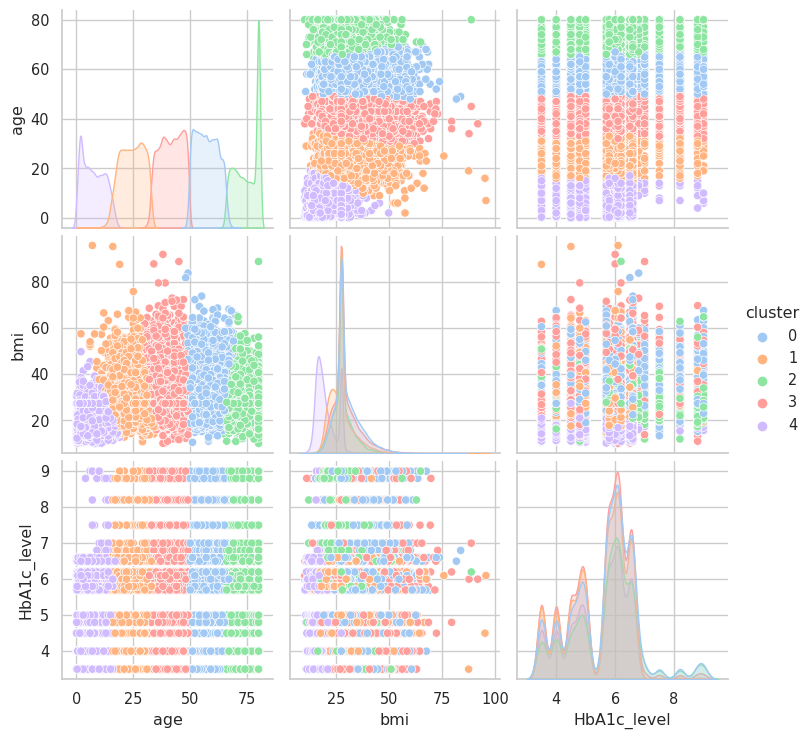

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster',palette="pastel")

Também podemos observar a posição dos centróides:

In [ ]:
clusters_centers = model.cluster_centers_
clusters_centers = pd.DataFrame(clusters_centers, columns=['age','bmi','HbA1c_level'])
clusters_centers.head()

,age,bmi,HbA1c_level
0,25.224581,27.445962,5.410848
1,58.103959,29.860366,5.644331
2,7.746254,20.184957,5.413375
3,75.153365,27.689076,5.694252
4,42.461852,29.384203,5.480890


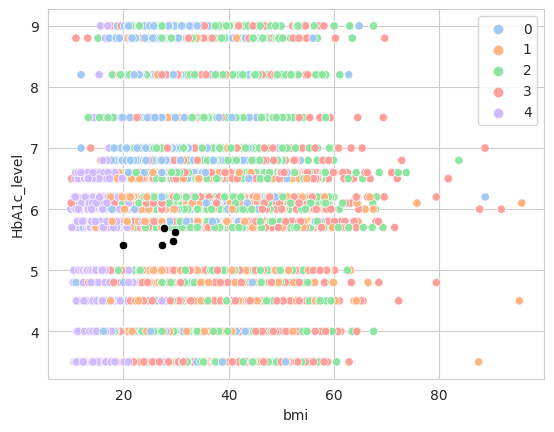

In [ ]:
with sns.axes_style('whitegrid'):

  fig, ax = plt.subplots()
  sns.scatterplot(data=clustered_data, x ='bmi',y='HbA1c_level', hue='cluster', palette="pastel", ax=ax)
  sns.scatterplot(data=clusters_centers, x='bmi',y='HbA1c_level', color='black',ax=ax)

>Devido ao grande tamanho e à alta variação dos valores da base de dados, não conseguimos obter resultados satisfatórios para os valores dos centroides.

### Avaliação

**WCSS**


O WCSS mede o quão próximo o centróide de um cluster está dos objetos alocados, se o WCSS é baixo, os objetos estão próximos entre si. Para buscar uma boa generalização vamos utilizar o **método do cotovelo**:

In [ ]:
wcss = []

for k in range(1, 11):

  model = KMeans(n_clusters=k)
  model = model.fit(data)
  wcss.append(model.inertia_)

<ipython-input-33-d0962b3eb6f7>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(x=range(1,11), y=wcss, marker="8",palette="pastel")


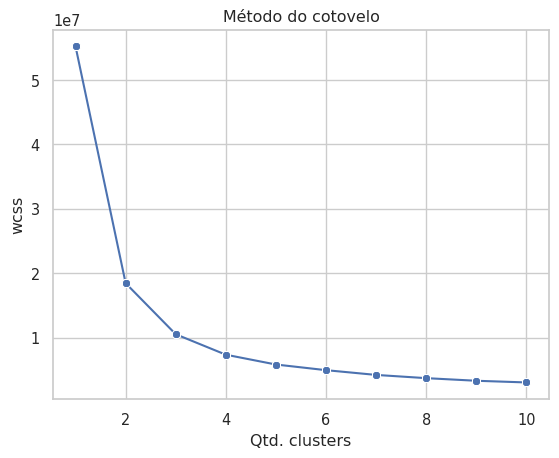

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1,11), y=wcss, marker="8",palette="pastel")
  grafico.set(title='Método do cotovelo', ylabel='wcss', xlabel='Qtd. clusters');



*   **4 clusters**



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


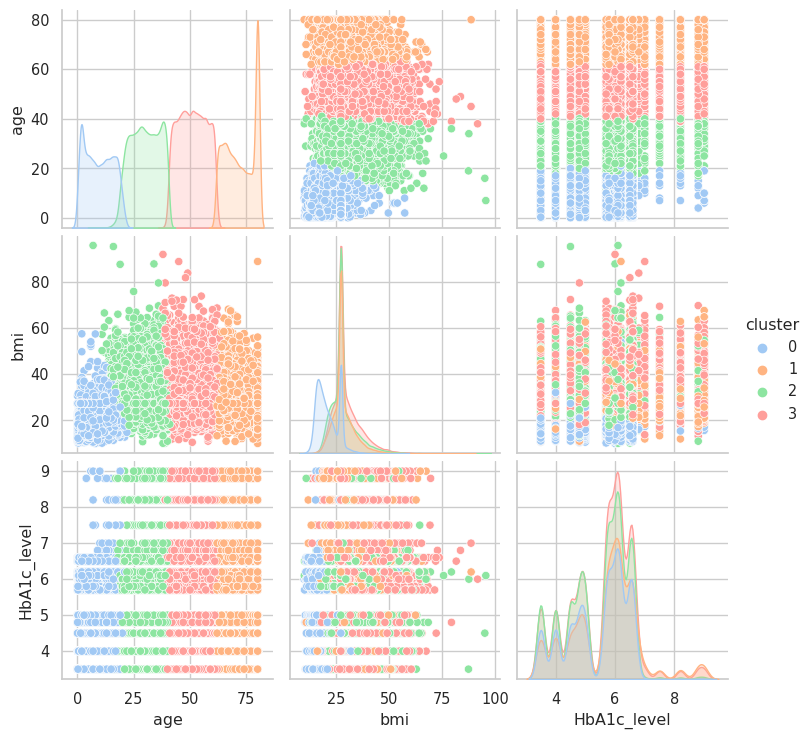

In [ ]:
model = KMeans(n_clusters= 4)
model = model.fit(data)

clusters = model.labels_
clustered_data = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster',palette="pastel")



*   **6 Clusters**



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


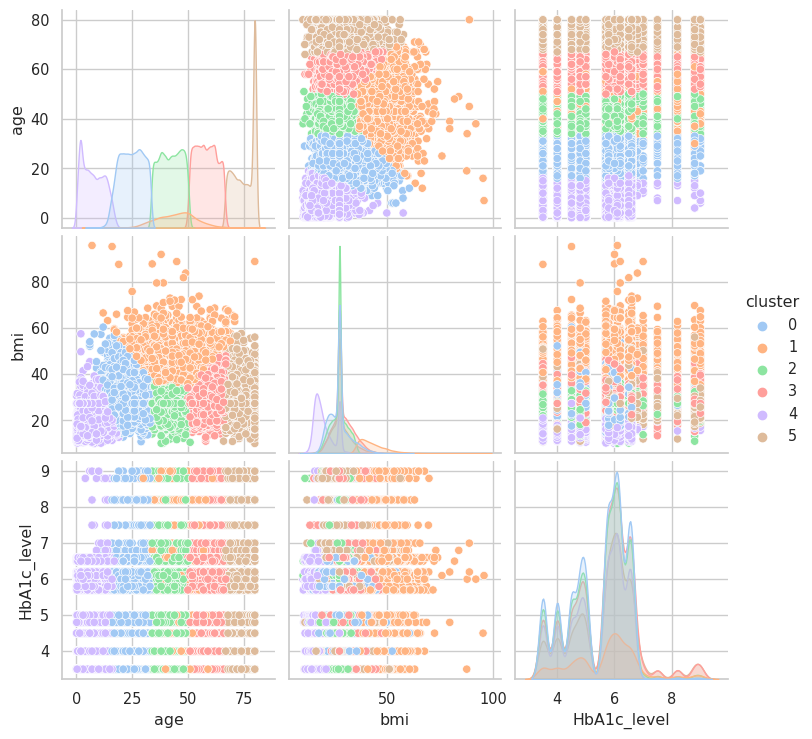

In [ ]:
model = KMeans(n_clusters= 6)
model = model.fit(data)

clusters = model.labels_
clustered_data = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster',palette="pastel")



*   **5 clusters**



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


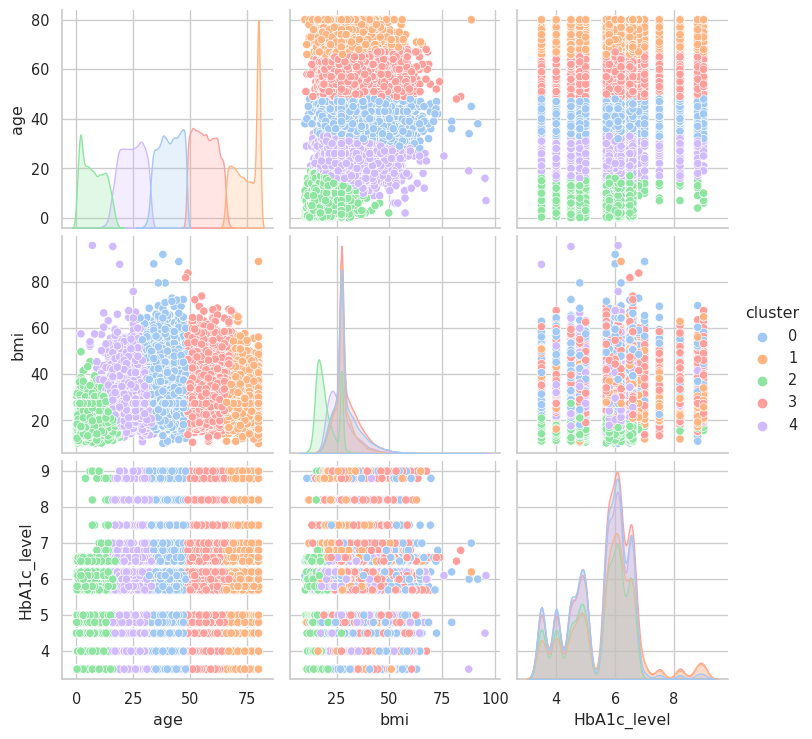

In [ ]:
model = KMeans(n_clusters = 5)
model = model.fit(data)

clusters = model.labels_
clustered_data = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster',palette="pastel")

### Predição

Após o treinamento, avaliação e seleção do modelo, podemos utilizá-lo para resolver problemas reais para os quais ele foi construído.

**ESTUDO DOS CLUSTERS**

Para direcionar ações necessárias para atender as necessidades dos pacientes da base de dados, vamos fazer um breve estudos de cada grupo.



*   **Cluster = 0**



São pacientes com idade de 28 a 48 anos com IMC variando de 20 a 70.

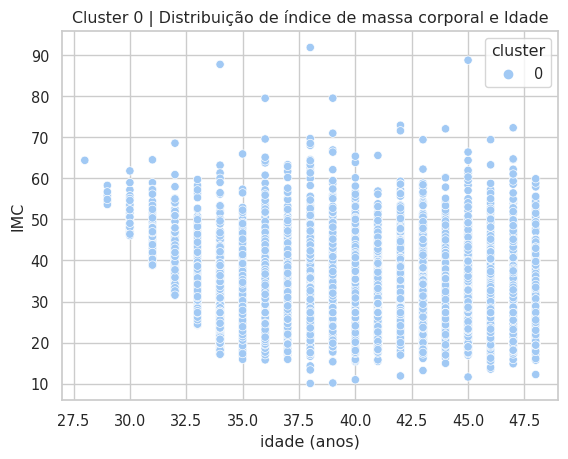

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 0'), x="age",y="bmi", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 0 | Distribuição de índice de massa corporal e Idade', xlabel='idade (anos)', ylabel='IMC')
  grafico.get_legend().set_title("cluster");

>**Conclusão**: Vemos acima um caso preocupante, em que a maioria dos pacientes está acima do peso, o que pode aumentar o risco de desenvolvimento de diabetes e outras doenças.



*   **cluster =1**



São pacientes que possuem uma idade elevada de 65 a 80 com IMC médio de 10 a 50.

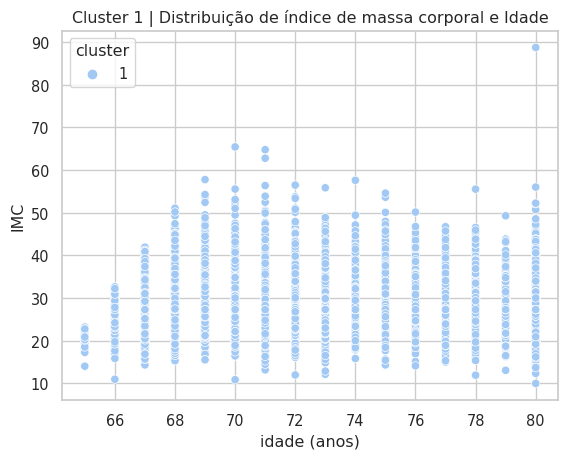

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 1'), x="age",y="bmi", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 1 | Distribuição de índice de massa corporal e Idade', xlabel='idade (anos)', ylabel='IMC')
  grafico.get_legend().set_title("cluster");

>**Conclusão**: Observando os dados, notamos que, apesar de haver uma boa quantidade de pacientes com peso normal, a maioria dos pacientes idosos da base de dados está acima do peso.



*   **Cluster = 2**



São pacientes jovens com uma idade entre 0 a 18 anos e IMC médio de 10 a 40.

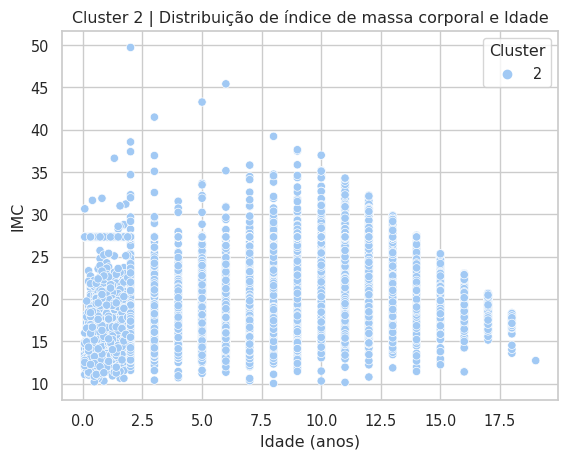

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 2'), x="age", y="bmi", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 2 | Distribuição de índice de massa corporal e Idade', xlabel='Idade (anos)', ylabel='IMC');
  grafico.get_legend().set_title("Cluster");

>**Conclusão**: Nos dados acima, podemos observar que a maioria dos pacientes está concentrada na faixa etária de 0 a 5 anos, o que indica que este gráfico se trata dos pacientes mais jovens. Nesta faixa etária, a maioria dos pacientes tem IMC entre 10 e 30, com poucos casos acima desse valor. Isso é preocupante, pois sugere que há um problema de obesidade infantil que precisa ser resolvido.



*   **Cluster = 3**


São pacientes com idade média de 48 a 68 anos com IMC concentrado entre 20 até 80.

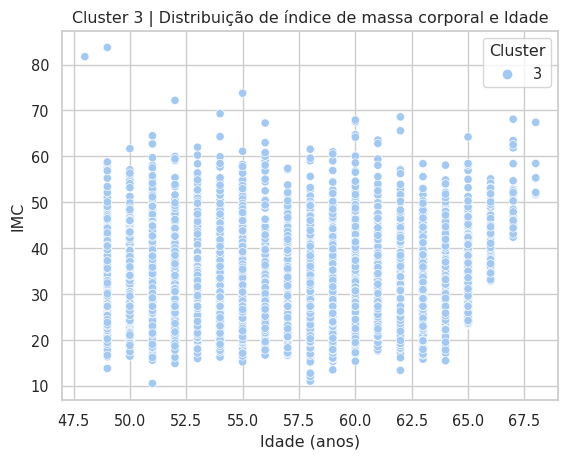

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 3'), x="age", y="bmi", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 3 | Distribuição de índice de massa corporal e Idade', xlabel='Idade (anos)', ylabel='IMC');
  grafico.get_legend().set_title("Cluster");

>**Conclusão**: Ao analisar os dados acima, podemos observar que a maioria dos pacientes está concentrada na faixa etária de 50 a 60 anos. Apesar de haver pacientes com peso normal, a maioria está acima do peso. É importante entender as causas desse quadro para desenvolver estratégias para revertê-lo.



*   **Cluster = 4**



São pacientes com idade de 5 a 35 anos com IMC médio de 20 a 60.

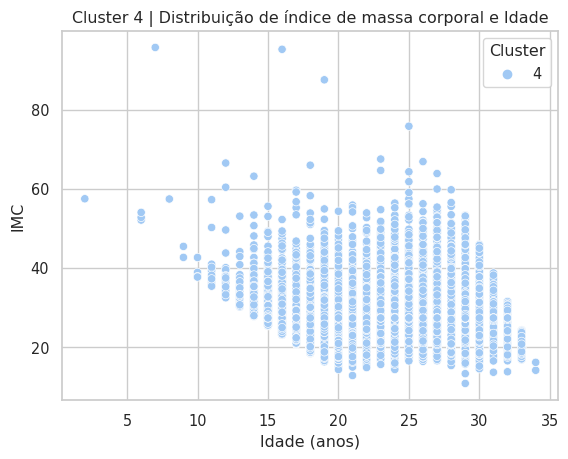

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 4'), x="age", y="bmi", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 4 | Distribuição de índice de massa corporal e Idade', xlabel='Idade (anos)', ylabel='IMC');
  grafico.get_legend().set_title("Cluster");

>**Conclusão**: Ao observarmos o gráfico acima, podemos ver que, como nos exemplos anteriores, há pacientes com IMC em todas as faixas, desde abaixo do peso até obesidade. Isso ocorre porque estamos trabalhando com um enorme banco de dados, que inclui pacientes com diferentes características.
Já, neste gráfico específico, podemos observar que a maioria dos pacientes está com IMC muito alto. Isso é preocupante, pois pode estar associado a um maior risco de doenças e complicações de saúde.


**PREDIÇÃO**



*   **EXEMPLO**: Mario tem 25 anos, IMC de 35 e nível médio de açúcar no sangue de 5.6%.



In [ ]:
Mario = display(Image(url='https://img.freepik.com/psd-gratuitas/ilustracao-3d-de-uma-pessoa-com-oculos-de-sol_23-2149436188.jpg?w=740&t=st=1694273202~exp=1694273802~hmac=6591536fbef87090f22806f643e5e398454c640abfa4cb0aa47f6b275fbdd754',width=200))

In [ ]:
Mario = np.array([25.00,35.00,5.6])

In [ ]:
cluster = model.predict(Mario.reshape(1,-1))
print(cluster)

[4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


>Conclui-se que o paciente pertence ao **cluster 4** com idade média de de 5 a 35 anos e IMC médio 20 a 60.



*   **EXEMPLO2**: Juliana tem 5 anos, IMC de 40 e nível médio de açúcar de 1.3%.



In [ ]:
Julia = display(Image(url='https://img.freepik.com/psd-gratuitas/ilustracao-3d-de-pessoa_23-2149436192.jpg?w=740&t=st=1694273571~exp=1694274171~hmac=353208d2563993ddcb59e0af20dcae13df9d7ed492a2231693637cdb6083e97e',width=200))

In [ ]:
Julia = np.array([5.00,40.00,1.3])

In [ ]:
cluster2 = model.predict(Julia.reshape(1,-1))
print(cluster2)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


> Conclui-se que a paciente pertence ao **Cluster 2**  com idade entre 0 a 18 anos e IMC médio de 10 a 40.

## CLASSIFICAÇÃO

In [ ]:
display(Image(url='https://media.istockphoto.com/id/1272421423/pt/vetorial/tiny-doctor-insert-sample-with-blood-into-digital-glucose-meter-to-control-diabetes.jpg?s=612x612&w=0&k=20&c=XUZa19a5XQ0djcbBvPR7SPjXLSdu_qRODbRq6lVQA7Y=',width=700))

> Dado o **nível de glicose no sangue**, **hipertensão**, **doença cardíaca** e **histórico de fumo** de um paciente, qual é o seu diagnóstico: com diabetes ou sem diabetes.

Uma possível solução para esse problema seria o conjunto de condições `if-else` como no exemplo abaixo:

```python
def f(blood_glucose_level: int, hypertesion: int, heart_disease: int, smoking_history: str) -> str:
  if blood_glucose_level > 250:
    if hypertesion == 0:
      if heart_disease == 0:
        if smoking_history == 1:
      return 'possui diabetes'
    else:
      return 'não possui'

```

Vamos representar gráficamente em uma **árvore de decisão**, onde as **folhas** representam as classes do atributo alvo e os **nós** as regras de decisão.

### Pré Processamento

In [ ]:
dados.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

Vamos verificar quais são os valores únicos da coluna diabetes na tabela dados.

In [ ]:
data = dados[["diabetes"]].drop_duplicates()
data.head()

,diabetes
0,0
6,1


Vamos substituir os valores 0 e 1, por 'não possui' e 'possui diabetes', respectivamente.

In [3]:
dados['diabetes'] = dados['diabetes'].replace([0, 1], ['não possui', 'possui diabetes'])
dados.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,não possui
1,Female,54.0,0,0,No Info,27.32,6.6,80,não possui
2,Male,28.0,0,0,never,27.32,5.7,158,não possui
3,Female,36.0,0,0,current,23.45,5.0,155,não possui
4,Male,76.0,1,1,current,20.14,4.8,155,não possui
5,Female,20.0,0,0,never,27.32,6.6,85,não possui
6,Female,44.0,0,0,never,19.31,6.5,200,possui diabetes
7,Female,79.0,0,0,No Info,23.86,5.7,85,não possui
8,Male,42.0,0,0,never,33.64,4.8,145,não possui
9,Female,32.0,0,0,never,27.32,5.0,100,não possui


In [ ]:
data = dados[["diabetes"]].drop_duplicates()
data.head()

,diabetes
0,não possui
6,possui diabetes


Agora vamos tratar os valores de smoking_story que vamos utilizar logo abaixo.

In [ ]:
data = dados[["smoking_history"]].drop_duplicates()
data.head()

,smoking_history
0,never
1,No Info
3,current
11,former
19,ever


In [4]:
smoking_history_mapper = {
    "never": 5,
    "No Info": 4,
    "current": 3,
    "former": 2,
    "ever": 1,

}

In [5]:
dados['smoking_history_encoded'] = dados['smoking_history'].apply(lambda level: smoking_history_mapper[level] if level in smoking_history_mapper else 'valor_padrao')

In [6]:
dados['smoking_history_encoded'] = dados['smoking_history_encoded'].replace('valor_padrao', -1).astype(int)

In [ ]:
dados.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,não possui,5
1,Female,54.0,0,0,No Info,27.32,6.6,80,não possui,4
2,Male,28.0,0,0,never,27.32,5.7,158,não possui,5
3,Female,36.0,0,0,current,23.45,5.0,155,não possui,3
4,Male,76.0,1,1,current,20.14,4.8,155,não possui,3
5,Female,20.0,0,0,never,27.32,6.6,85,não possui,5
6,Female,44.0,0,0,never,19.31,6.5,200,possui diabetes,5
7,Female,79.0,0,0,No Info,23.86,5.7,85,não possui,4
8,Male,42.0,0,0,never,33.64,4.8,145,não possui,5
9,Female,32.0,0,0,never,27.32,5.0,100,não possui,5


In [ ]:
data = dados[["smoking_history_encoded"]].drop_duplicates()
data.head()

,smoking_history_encoded
0,5
1,4
3,3
11,2
19,1


### Dados



*   **Não possui diabetes**



In [ ]:
dados.query("diabetes == 'não possui'").describe().T

,count,mean,std,min,25%,50%,75%,max
age,91500.0,40.115187,22.306005,0.08,22.00,40.00,57.00,80.00
hypertension,91500.0,0.058984,0.235595,0.00,0.00,0.00,0.00,1.00
heart_disease,91500.0,0.029235,0.168465,0.00,0.00,0.00,0.00,1.00
bmi,91500.0,26.887163,6.373406,10.01,23.24,27.32,28.87,95.69
HbA1c_level,91500.0,5.396761,0.971628,3.50,4.80,5.80,6.20,6.60
blood_glucose_level,91500.0,132.852470,34.247281,80.00,100.00,140.00,158.00,200.00
smoking_history_encoded,91500.0,3.655803,1.606035,-1.00,3.00,4.00,5.00,5.00




*   **Possui diabetes**



In [ ]:
dados.query("diabetes == 'possui diabetes'").describe().T

,count,mean,std,min,25%,50%,75%,max
age,8500.0,60.946588,14.549880,3.00,52.00,62.00,72.0000,80.00
hypertension,8500.0,0.245647,0.430496,0.00,0.00,0.00,0.0000,1.00
heart_disease,8500.0,0.149059,0.356167,0.00,0.00,0.00,0.0000,1.00
bmi,8500.0,31.988382,7.558371,10.98,27.32,29.97,35.9125,88.72
HbA1c_level,8500.0,6.934953,1.076562,5.70,6.10,6.60,7.5000,9.00
blood_glucose_level,8500.0,194.094706,58.641111,126.00,145.00,160.00,240.0000,300.00
smoking_history_encoded,8500.0,3.335529,1.827966,-1.00,2.00,4.00,5.0000,5.00


Observamos que alguns atributos que podem influenciar o diagnóstico de diabetes apresentam diferenças nas duas tabelas acima. A tabela "possui diabetes" apresenta a maior média de hipertensão, doenças cardíacas e outros fatores que podem estar associados ao diagnóstico de diabetes. Para visualizar melhor essas diferenças, vamos plotar gráficos a seguir.

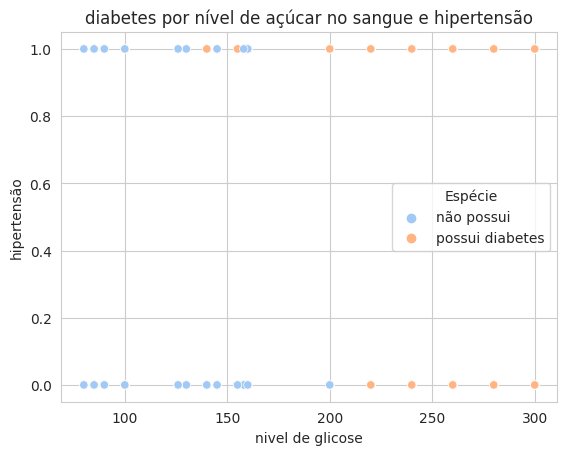

In [8]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=dados, x="blood_glucose_level", y="hypertension", hue="diabetes", palette="pastel")
  grafico.set(title='diabetes por nível de açúcar no sangue e hipertensão', xlabel='nivel de glicose', ylabel='hipertensão');
  grafico.get_legend().set_title("Espécie");

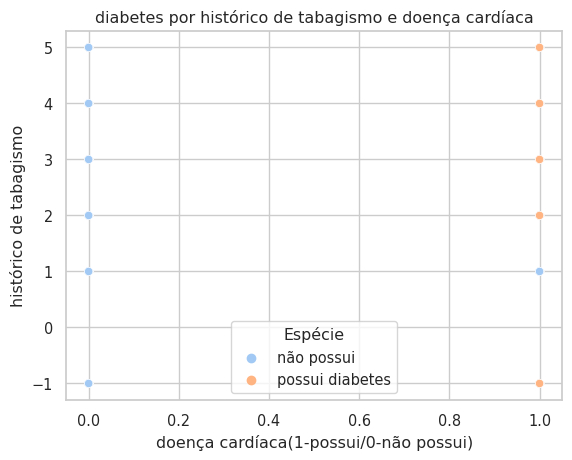

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=dados, x="heart_disease", y="smoking_history_encoded", hue="diabetes", palette="pastel")
  grafico.set(title='diabetes por histórico de tabagismo e doença cardíaca', xlabel='doença cardíaca(1-possui/0-não possui)', ylabel='histórico de tabagismo');
  grafico.get_legend().set_title("Espécie");

>Após a análise dos dados, temos evidências suficientes para modelar o diagnóstico dos pacientes em função do nível de glicose no sangue, hipertensão, doença cardíaca e histórico de fumo. A seguir, vamos definir as colunas a serem utilizadas na variável data e coletar apenas as 100 primeiras linhas. Isso ocorre porque a base de dados possui um grande número de valores, e selecionar todos eles dificultaria a visualização da árvore de decisão.

In [ ]:
data = dados[["diabetes", "blood_glucose_level","hypertension","heart_disease","smoking_history_encoded"]].head(100)
data.head()

,diabetes,blood_glucose_level,hypertension,heart_disease,smoking_history_encoded
0,não possui,140,0,1,5
1,não possui,80,0,0,4
2,não possui,158,0,0,5
3,não possui,155,0,0,3
4,não possui,155,1,1,3


O resultado do pré-processamento realizado anteriormente nos tras os dados prontos para serem utilizados no nosso projeto.

In [ ]:
data.query("diabetes == 'não possui'").tail()

,diabetes,blood_glucose_level,hypertension,heart_disease,smoking_history_encoded
93,não possui,130,0,0,5
95,não possui,80,0,0,5
97,não possui,90,0,0,4
98,não possui,100,0,0,4
99,não possui,158,0,0,3


In [ ]:
data.query("diabetes == 'possui diabetes'").tail()

,diabetes,blood_glucose_level,hypertension,heart_disease,smoking_history_encoded
59,possui diabetes,155,0,0,5
81,possui diabetes,126,0,0,4
87,possui diabetes,220,0,0,3
94,possui diabetes,300,0,0,5
96,possui diabetes,159,0,0,5


### Treino/Teste

Um modelo de aprendizado de máquina precisa ser treinado com um conjunto de dados de treinamento e avaliado com um conjunto de dados de teste. Assim, dividimos a base de dados em duas partes, uma maior para treinamento e outra menor para teste. Portanto, desenvolvemos um modelo capaz de generalizar suas predições para dados não vistos.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['diabetes'], axis=1),
    data['diabetes'],
    test_size=0.25,
    random_state=123
)



*   **Variáveis preditoras(predictors)**



In [ ]:
predictors_train.head()

,blood_glucose_level,hypertension,heart_disease,smoking_history_encoded
91,145,0,0,5
85,145,0,0,5
9,100,0,0,5
53,159,0,0,2
41,130,0,0,4


In [ ]:
predictors_train.shape

(75, 4)

In [ ]:
predictors_test.head()

,blood_glucose_level,hypertension,heart_disease,smoking_history_encoded
8,145,0,0,5
70,158,0,0,4
82,200,0,0,2
28,158,1,0,5
63,159,0,0,2


In [ ]:
predictors_test.shape

(25, 4)



*   **Variável resposta(target)**



In [ ]:
target_train.head()

91         não possui
85         não possui
9          não possui
53    possui diabetes
41         não possui
Name: diabetes, dtype: object

In [ ]:
target_train.shape

(75,)

In [ ]:
target_test.head()

8     não possui
70    não possui
82    não possui
28    não possui
63    não possui
Name: diabetes, dtype: object

In [ ]:
target_test.shape

(25,)

### Treino

No caso da árvore de decisão, estamos interessados em encontrar um conjunto de regras simples (**nós**) que vão dividir o conjunto de dados em categorias (**folhas**) através do uso de uma métrica de **impureza**.

**ALGORITMO**

O treino da arvore de decisão é feito utilizando o algoritmo **CART**. Que seria um processo iterativo que constrói **nós** (`if-else`) através da escolha de um atributo e um valor de corte utilizando uma métrica de **impureza**.

In [ ]:
model = model.fit(predictors_train, target_train)

In [ ]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['blood_glucose_level', 'hypertension', 'heart_disease',
        'smoking_history_encoded'], dtype=object),
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array(['não possui', 'possui diabetes'], dtype=object),
 'n_classes_': 2,
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x7eabd0553f30>}

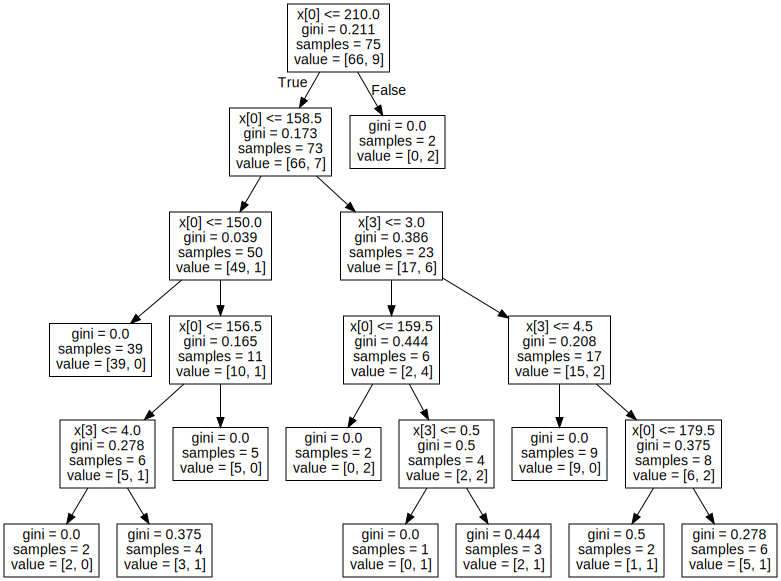

In [ ]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

Com o modelo treinado, podemos fazer predições.

In [ ]:
data.head(1)

,diabetes,blood_glucose_level,hypertension,heart_disease,smoking_history_encoded
0,não possui,140,0,1,5


In [ ]:
features = np.array([140,0,1,5])
prediction = model.predict(features.reshape(1, -1))

print(prediction)

['não possui']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Avaliação

Agora vamos avaliar a capacidade de generalização(capacidade de realizar predições) do modelo, não visto da etapa de treino.



*  **Posição predita**



In [ ]:
target_predicted = model.predict(predictors_test)

In [ ]:
target_predicted[0:5]

array(['não possui', 'não possui', 'não possui', 'não possui',
       'possui diabetes'], dtype=object)

In [ ]:
target_predicted.shape

(25,)



*   **Posição teste**



In [ ]:
target_test[0:5]

8     não possui
70    não possui
82    não possui
28    não possui
63    não possui
Name: diabetes, dtype: object

In [ ]:
target_test.shape

(25,)

### Matriz de confusão

A matriz de confusão é uma técnica que resume as predições feitas por um modelo supervisionado de classificação em uma matriz, facilitando a comparação com as classes reais.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

[[21  2]
 [ 1  1]]


Vamos visualizar em um mapa de calor:

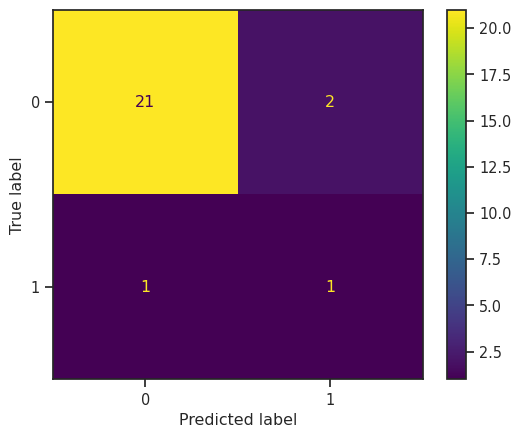

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(target_test, target_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Acurácia

A **acurácia** é uma métrica que combina a exatidão (o quão certo) e a precisão (o quanto desvia) das predições de um modelo supervisionado de classificação.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
total = cm.sum()
print(total)

25


In [ ]:
acertos = np.diag(cm).sum()
print(acertos)

22


In [ ]:
acuracia = acertos / total
print(acuracia)

0.88


In [ ]:
print(f"{round(100 * acuracia, 2)}%")

88.0%


In [ ]:
acuracia = accuracy_score(target_test, target_predicted)
print(acuracia)

0.88


In [ ]:
print(f"{round(100 * acuracia, 2)}%")

88.0%


Vemos que a taxa de precisão das predições do modelo está em 88%.

### Predição

Com o modelo treinado, avaliado e selecionado, podemos utiliza-lo para realizar as predições que motivaram a sua construção.



*   **Jose**: paciente com blood_glicose = 150; hypertesion = 1; heart_disease= 1; smoking_history=1.



In [ ]:
jose = display(Image(url='https://img.freepik.com/psd-gratuitas/ilustracao-3d-de-uma-pessoa-com-oculos_23-2149436189.jpg?w=740&t=st=1694273724~exp=1694274324~hmac=9addc0d9e17674d376bfc58b69a0ddcc6019516eb83d16c19e85a33c03dda11e',width=200))

In [ ]:
jose = np.array([150,1,1,1])

In [ ]:
diabetes =model.predict(jose.reshape(1,-1))
print(diabetes)

['não possui']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Maria**: paciente com blood_glicose = 300; hypertesion=1; heart_disease=1; smoking_history=1.

In [ ]:
Maria = display(Image(url='https://img.freepik.com/psd-gratuitas/ilustracao-3d-de-uma-pessoa-com-oculos-de-sol_23-2149436180.jpg?w=740&t=st=1694273958~exp=1694274558~hmac=9440603d843cb6c27735b0db1a00d923c39aa4340384ad999cefee8f3ee37435',width=200))

In [ ]:
Maria = np.array([300,1,1,1])

In [ ]:
diabetes2 = model.predict(Maria.reshape(1,-1))
print(diabetes2)

['possui diabetes']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Vamos acompanhar abaixo, um visual de árvore de decisão com um conjunto de regras, ou seja, os parâmetros aprendidos durante o treinamento do modelo, aos dados de entrada.

In [ ]:
model.classes_

array(['não possui', 'possui diabetes'], dtype=object)

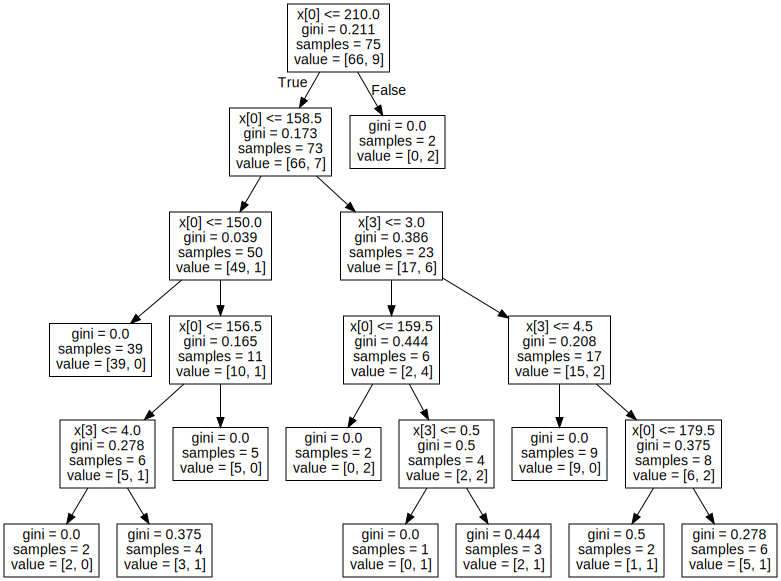

In [ ]:
graph

## Dashboard

Para a realização desse projeto eu também decidi criar um dashboard no power Bi para auxiliar na análise do conjunto de dados, com a implementação de visuais para entender a distribuição e o comportamento dos dados e em especial para o visual de IA que mostra a probabilidade do paciente ter diabetes com base em alguns atributos que selecionamos nos gráficos.

Link do dashboard:https://bit.ly/Micael-Lima-Analista-de-dados-Dashboard-Diabetes

## Conclusão



*   Utilizamos práticas de computação na linguagem python para preparar  os dados para a realização do projeto.
*   Exploramos os dados plotando gráficos para verificar a distribuição dos atributos que iríamos trabalhar, a fim de entendê-los melhor.
*   Realizamos dois métodos de predição com aprendizado de máquina: classificação e Regressão.
*  Utilizamos técnicas de aprendizado de máquina para preparar nossos dados para o projeto, como treinamento, teste e avaliação, a fim de realizar uma boa predição dos dados.
* Por fim, conseguimos tirar vários insights em relação aos dados a partir da visualização dos gráficos dos grupos de clusters, da árvore de decisão e dos modelos de predição, que são capazes de identificar o perfil de um paciente.



## Referências

Alguns sites que serviram de auxílio no desenvolvimento desse projeto:


*  https://ebaconline.com.br/
*  https://www.kaggle.com/
*  https://seaborn.pydata.org/tutorial/introduction.html
*  https://br.freepik.com/
*  https://scikit-learn.org/stable/

